### The Sparks Foundation #GRIPAUGUST21
### Author : Jayashree Jadhav S 
### Task : 1
### Title : Prediction using Supervised Machine Learning

# 1: Simple Linear Regression
The linear regression model is a classical Supervised learning Algorithm. It is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. e.g. the relationship between rainfall and soil erosion).
The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours studied. This is a simple linear regression task as it involves just two variables.

# 1.1: Objective
1. To predict the percentage of a student based on the no. of study hours using supervised machine learning.
2. To predict the score of a student who studies for 9.25 hrs/ day.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
slr_data = pd.read_csv(url)


In [3]:
#Obtaining the size of the data
print("Size of the given data set",slr_data.shape)

Size of the given data set (25, 2)


# 1.2: Data description
The data set consists of records of Number of Hours studied and Percenatge Score of 25 students.

In [4]:
# checking for null values in the data
slr_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values found in the data set.

In [5]:
# 5-point description for the data
slr_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


If a student studies for an average of 5.012 hours gets a mean score, 51.480. From the data, the minimum and maximum number of hours studied are 1.1 hours and 9.2 hours respectively whereas minimum and maximum scores obtained are 17 and 95.

In [6]:
print("Data imported successfully")
slr_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 1.3: Exploratory Data Analysis

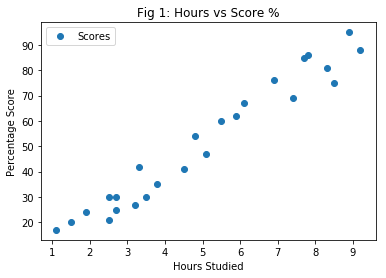

In [7]:
# Plotting the distribution of scores
slr_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Fig 1: Hours vs Score %')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

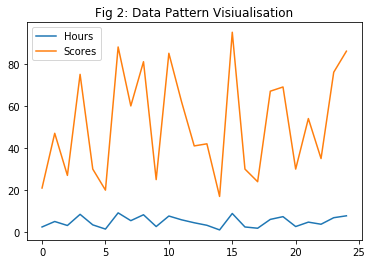

In [8]:
# Data Pattern Visiualisation
slr_data.plot(kind='line')
plt.title("Fig 2: Data Pattern Visiualisation")
plt.show()

We observe that, Scores and Hours exhibit the same pattern but Scores have a greater mean and variance when compared to Hours.

Text(0.5,1,'Fig 4: Box Plot of Number of Hours Studied')

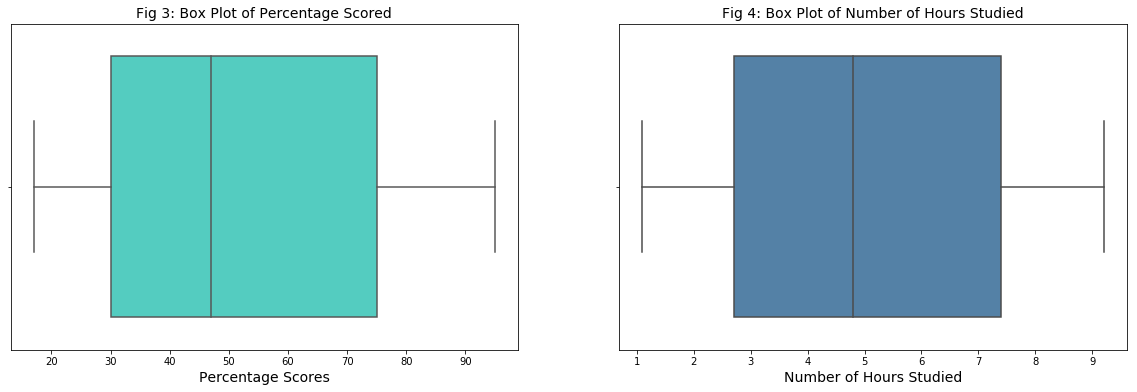

In [9]:
# Creating Box PLot for Percentage Scored and Number of hours studied.
ig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (20,6))
ax = sns.boxplot(slr_data['Scores'],
                   color = 'turquoise',
                 ax=ax1)
ax.set_xlabel('Percentage Scores',size = 14)
ax.set_title('Fig 3: Box Plot of Percentage Scored',size = 14)

ax = sns.boxplot(slr_data['Hours'],
                  color = 'steelblue',
                 ax=ax2)
ax.set_xlabel('Number of Hours Studied',size = 14)
ax.set_title('Fig 4: Box Plot of Number of Hours Studied',size = 14)

We observe that there are no outliers in the Scores and Hours . 

1. From the box plot of the score data, the median score is 47% which means that 50% of students have scored less than 47% and 50% of students have scored more than 47%. Also the data is positively skewed indicating that there is greater proportion of students scoring more than 47%.


2. From the box plot of the hours data, the median hour is 4.8 which means that 50% of students have studied less than 4.8 hours and 50% of students have studied for more than 4.8. Also the data is positively skewed indicating that there is greater proportion of students who spend more than 4.8 hours in studying.


# 1.4: Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = slr_data.iloc[:, :-1].values  # Hours
y = slr_data.iloc[:, 1].values  # Scores

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

# 1.5: Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [12]:
# Modelling using Statsmodel
import statsmodels.api as sm
# Add a constant. Esentially, we are adding a new column (equal in lenght to x)
x_train_sm = sm.add_constant(X_train)
# Fit the model, according to the OLS (ordinary least squares) 
# method with a dependent variable y and an independent x
model = sm.OLS(y_train,x_train_sm).fit()
print("Training Complete.")

Training Complete.


In [13]:
# Obtaining summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           2.79e-13
Time:                        21:18:02   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the summary of model.

1. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.952 would mean our model explains 95.2% of the change in our ‘Scores’ variable. 
 
 
2. P>|t| is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.000 for Hours is saying there is a 0% chance the Hours variable has no affect on the dependent variable, Scores, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05.


3. Skew is a measurement of symmetry in our data, with 0 being perfect symmetry. Kurtosis measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.


4. Durbin-Watson is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. Durbin-Watson statitic for 1.813 for our data set which means it's homoscedastic in nature.


In [14]:
# Modelling using LinearRegression package
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


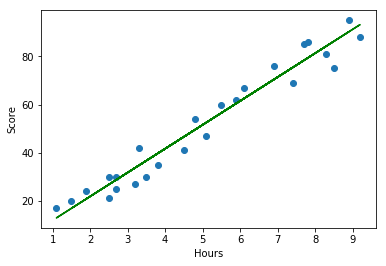

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='g')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("")
plt.show()

# 1.6: Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Hence, a student who studies for 9.25 hours gets 93.6917 score.

# 1.7: Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


Our model’s MAE is 4.1838, which is fairly small given that our data’s Scores range from 17 to about 95 (in %).

# 1.8: Conclusion
We have performed Simple Linear Modelling using StatsModel as Sklearn and predicted the value of percentage score for 9.25 hours to be 93.6917. Model evaluation is done based on Mean Absolute Error.

# Thank You !